In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
samples, labels = load_wine(return_X_y=True)

In [110]:
X = samples.transpose()
mean_vec = (np.sum(X, axis=1))/178
print(mean_vec)
mean_mat = np.tile(mean_vec.reshape(13,1),[1,178])
X = X - mean_mat

[  1.30006180e+01   2.33634831e+00   2.36651685e+00   1.94949438e+01
   9.97415730e+01   2.29511236e+00   2.02926966e+00   3.61853933e-01
   1.59089888e+00   5.05808988e+00   9.57449438e-01   2.61168539e+00
   7.46893258e+02]


In [111]:
XXT = np.matmul(X, X.transpose())
w, v = np.linalg.eig(XXT)
x_tilde1 = (v[:,0:2]).T@X

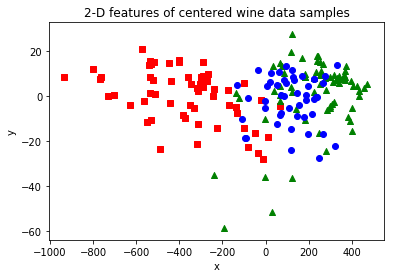

In [112]:
x0 = []
y0 = []
for i in range(178):
    if(labels[i] == 0):
        x0.append(x_tilde1[0][i])
        y0.append(x_tilde1[1][i])
plt.scatter(x0, y0, c='red', marker='s')
x1 = []
y1 = []
for i in range(178):
    if(labels[i] == 1):
        x1.append(x_tilde1[0][i])
        y1.append(x_tilde1[1][i])
plt.scatter(x1, y1, c='green', marker='^')
x2 = []
y2 = []
for i in range(178):
    if(labels[i] == 2):
        x2.append(x_tilde1[0][i])
        y2.append(x_tilde1[1][i])
plt.scatter(x2, y2, c='blue', marker='o')
plt.title('2-D features of centered wine data samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

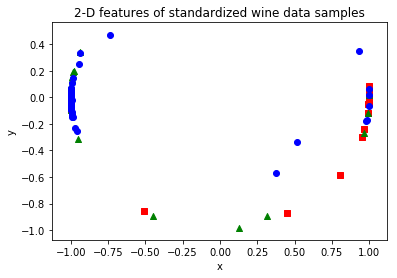

In [113]:
for i in range(178):
    X[:,i:i+1] = X[:,i:i+1]/np.linalg.norm(X[:,i:i+1])
XXT = np.matmul(X, X.transpose())
w, v = np.linalg.eig(XXT)
x_tilde2 = (v[:,0:2]).T@X
x0 = []
y0 = []
for i in range(178):
    if(labels[i] == 0):
        x0.append(x_tilde2[0][i])
        y0.append(x_tilde2[1][i])
plt.scatter(x0, y0, c='red', marker='s')
x1 = []
y1 = []
for i in range(178):
    if(labels[i] == 1):
        x1.append(x_tilde2[0][i])
        y1.append(x_tilde2[1][i])
plt.scatter(x1, y1, c='green', marker='^')
x2 = []
y2 = []
for i in range(178):
    if(labels[i] == 2):
        x2.append(x_tilde2[0][i])
        y2.append(x_tilde2[1][i])
plt.scatter(x2, y2, c='blue', marker='o')
plt.title('2-D features of standardized wine data samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Based on the plots above, standardizing the data would lead to better classification performance.

In [114]:
clf = GaussianNB()
clf.fit(x_tilde1.transpose(), labels)

GaussianNB(priors=None)